In [1]:
import torch


from model_architectures import MonaiDDPM
device = "cuda:0" if torch.cuda.is_available() else "cpu"


T = 1_000     

ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/025_MNIST_basic_DDPM/checkpoints/ddpm-epoch=08-train_loss=0.0017.ckpt" # MNIST EXAMPLE> WORKED WELL.
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/026_DDPM_revamped/checkpoints/ddpm-epoch=01-train_loss=0.3648.ckpt" # 
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/027_DDPM_MONAI/checkpoints/ddpm-epoch=09-step=39210.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/031_DDPM_classifier-free-test/checkpoints/epoch=09-step=9810.ckpt"
model = MonaiDDPM.load_from_checkpoint(
    ckpt_path
).to(device).eval()


Error importing huggingface_hub.file_download: 'Version'


/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


In [2]:
nb_images = 16
with torch.no_grad():
    samples = model.sample_cfg(
        N=nb_images,
        label=0,
        size=64,
        guidance_scale=4.0
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:13<00:00,  3.94it/s]


In [3]:
# No Guidance

# nb_images = 16
# with torch.no_grad():
#     samples = model.sample(
#         N=nb_images,
#         size=64
#     )
# image, intermediates = samples
# chain = torch.cat(intermediates, dim=-1)
# import matplotlib.pyplot as plt
# plt.imshow(chain[0, 0].cpu(), vmin=0, vmax=1, cmap="gray")
# plt.tight_layout()
# plt.axis("off")
# plt.show()

NameError: name 'images' is not defined

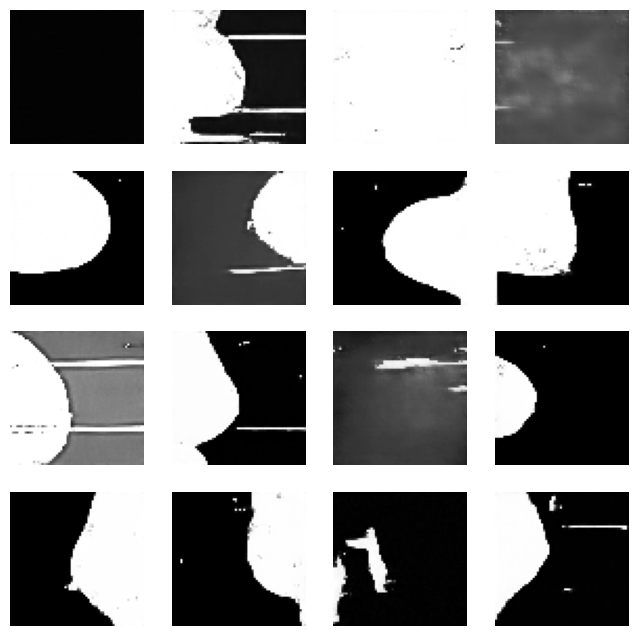

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(samples[i, 0].cpu(), cmap='gray', vmin=0, vmax=1)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 17))
for i in range(16):
    plt.subplot(9, 9, 1 + i)
    plt.axis('off')
    plt.imshow(image[i].squeeze(0).clip(0, 1).data.cpu().numpy(),
               cmap='gray')
# plt.savefig(f'inference/samples.png')